<a href="https://colab.research.google.com/github/PrithvirajChauhan1/AI-Hemanysys/blob/main/Model_training_AI_Hemansys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import itertools
import keras
import tensorflow

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense 
from tensorflow.keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
#%matplotlib inline
import math 
import datetime
import time

# **Defining the Dimensions and the directory of the train and test set**

In [ ]:
#Default dimensions we found online
img_width, img_height = 224, 224 
 
#Create a bottleneck file
top_model_weights_path = 'bottleneck_fc_model.h5'
# loading up our datasets
train_data_dir = '/content/drive/MyDrive/data/train'
validation_data_dir = '/content/drive/MyDrive/data/validation' 
test_data_dir = '/content/drive/MyDrive/data/test'
 
# number of epochs to train top model 
epochs = 7 #this has been changed after multiple model run 
# batch size used by flow_from_directory and predict_generator 
batch_size = 10 

In [ ]:
vgg16 = applications.VGG16(include_top=False, weights='imagenet')

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
start = datetime.datetime.now()
   
generator = datagen.flow_from_directory(  
     train_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_train_samples = len(generator.filenames)  
num_classes = len(generator.class_indices)  
   
predict_size_train = int(math.ceil(nb_train_samples / batch_size))  
   
bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train)  
   
np.save('bottleneck_features_train.npy', bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 270 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Time:  0:01:54.604851


In [ ]:
start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     validation_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_validation_samples = len(generator.filenames)  
   
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))  
   
bottleneck_features_validation = vgg16.predict_generator(  
     generator, predict_size_validation)  
   
np.save('bottleneck_features_validation.npy', bottleneck_features_validation) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 140 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Time:  0:00:39.929714


In [ ]:

start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     test_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_test_samples = len(generator.filenames)  
   
predict_size_test = int(math.ceil(nb_test_samples / batch_size))  
   
bottleneck_features_test = vgg16.predict_generator(  
     generator, predict_size_test)  
   
np.save('bottleneck_features_test.npy', bottleneck_features_test) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 160 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Time:  0:00:44.925574


In [ ]:
generator_top = datagen.flow_from_directory(  
         train_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
   
# load the bottleneck features saved earlier  
train_data = np.load('bottleneck_features_train.npy')  
   
# get the class lebels for the training data, in the original order  
train_labels = generator_top.classes  
   
# convert the training labels to categorical vectors  
train_labels = to_categorical(train_labels, num_classes=num_classes)

Found 270 images belonging to 4 classes.


In [ ]:
generator_top = datagen.flow_from_directory(  
         validation_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_validation_samples = len(generator_top.filenames)  
   
validation_data = np.load('bottleneck_features_validation.npy')  
   

validation_labels = generator_top.classes  
validation_labels = to_categorical(validation_labels, num_classes=num_classes)

Found 140 images belonging to 4 classes.


In [ ]:
generator_top = datagen.flow_from_directory(  
         test_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_test_samples = len(generator_top.filenames)  
   
test_data = np.load('bottleneck_features_test.npy')  
   

test_labels = generator_top.classes  
test_labels = to_categorical(test_labels, num_classes=num_classes)

Found 160 images belonging to 4 classes.


In [ ]:
start = datetime.datetime.now()
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3)))  
model.add(Dropout(0.5))  
model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3)))  
model.add(Dropout(0.3)) 
model.add(Dense(num_classes, activation='softmax'))  

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])  

history = model.fit(train_data, train_labels,  
      epochs=100,
      batch_size=batch_size,  
      validation_data=(validation_data, validation_labels))  

model.save_weights(top_model_weights_path)  

(eval_loss, eval_accuracy) = model.evaluate(  
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
27/27 [==============================] - 12s 27ms/step - loss: 1.2241 - acc: 0.5687 - val_loss: 0.4691 - val_acc: 0.7571
Epoch 2/100
27/27 [==============================] - 0s 6ms/step - loss: 0.6301 - acc: 0.7223 - val_loss: 0.6590 - val_acc: 0.6357
Epoch 3/100
27/27 [==============================] - 0s 6ms/step - loss: 0.5157 - acc: 0.7919 - val_loss: 0.4155 - val_acc: 0.7857
Epoch 4/100
27/27 [==============================] - 0s 6ms/step - loss: 0.4805 - acc: 0.7981 - val_loss: 0.4119 - val_acc: 0.8000
Epoch 5/100
27/27 [==============================] - 0s 6ms/step - loss: 0.4779 - acc: 0.8271 - val_loss: 0.3397 - val_acc: 0.8214
Epoch 6/100
27/27 [==============================] - 0s 6ms/step - loss: 0.3281 - acc: 0.9018 - val_loss: 0.3837 - val_acc: 0.8286
Epoch 7/100
27/27 [==============================] - 0s 5ms/step - loss: 0.3891 - acc: 0.8181 - val_loss: 0.4028 - val_acc: 0.8214
Epoch 8/100
27/27 [==============================] - 0s 5ms/step - loss: 0.2881 -

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               2508900   
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 204       
Total params: 2,514,154
Trainable params: 2,514,154
Non-trainable params: 0
______________________________________________

In [ ]:
model.evaluate(test_data, test_labels)

5/5 [==============================] - 0s 4ms/step - loss: 1.3298 - acc: 0.7750


[1.3297827243804932, 0.7749999761581421]

In [ ]:
print('test data', test_data)
preds = np.round(model.predict(test_data),0) 
#to fit them into classification metrics and confusion metrics, some additional modificaitions are required
print('rounded test_labels', preds)

test data [[[[0.         0.         0.         ... 0.         0.3400155
    0.        ]
   [0.         0.         0.04417676 ... 0.         0.5239333
    0.        ]
   [0.         0.         0.03926063 ... 0.         0.58399385
    0.        ]
   ...
   [0.         0.         0.         ... 0.         0.44304824
    0.        ]
   [0.         0.         0.16993403 ... 0.         0.26565635
    0.        ]
   [0.         0.         0.         ... 0.         0.18344456
    0.        ]]

  [[0.         0.         0.         ... 0.         0.5490206
    0.        ]
   [0.         0.         0.38121703 ... 0.         0.29545087
    0.        ]
   [0.         0.         0.4791956  ... 0.         0.4789756
    0.        ]
   ...
   [0.         0.         0.6558061  ... 0.02017937 0.46012467
    0.        ]
   [0.         0.         0.6280757  ... 0.         0.16568542
    0.        ]
   [0.         0.         0.04884848 ... 0.         0.17430973
    0.        ]]

  [[0.         0.         0.

In [ ]:
data = ['Lukemia', 'Anemia', 'Malaria', 'Healthy']
classification_metrics = metrics.classification_report(test_labels, preds, target_names=data )
print(classification_metrics)

              precision    recall  f1-score   support

     Lukemia       1.00      1.00      1.00        20
      Anemia       0.65      0.60      0.63        50
     Malaria       1.00      1.00      1.00        40
     Healthy       0.63      0.68      0.65        50

   micro avg       0.78      0.78      0.78       160
   macro avg       0.82      0.82      0.82       160
weighted avg       0.78      0.78      0.77       160
 samples avg       0.78      0.78      0.78       160



In [ ]:
def read_image(file_path):
    print("[INFO] loading and preprocessing image...")  
    image = load_img(file_path, target_size=(224, 224))  
    image = img_to_array(image)  
    image = np.expand_dims(image, axis=0)
    image /= 255.  
    return image

In [ ]:
def test_single_image(path):
    data= ['Lukemia', 'Anemia', 'Malaria', 'Healthy']
    images = read_image(path)
    time.sleep(.5)
    bt_prediction = vgg16.predict(images)  
    preds = model.predict_proba(bt_prediction)
    for idx, animal, x in zip(range(0,6), data , preds[0]):
        print("ID: {}, Label: {} {}%".format(idx, data, round(x*100,2) ))
    print('Final Decision:')
    time.sleep(.5)
    for x in range(3):
        print('.'*(x+1))
        time.sleep(.2)
    class_predicted = model.predict_classes(bt_prediction)
    class_dictionary = generator_top.class_indices  
    inv_map = {v: k for k, v in class_dictionary.items()}  
    print("ID: {}, Label: {}".format(class_predicted[0], inv_map[class_predicted[0]]))  
    return load_img(path)

In [ ]:
path='/content/drive/MyDrive/data/train/Anemia/download (1).png'

[INFO] loading and preprocessing image...


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


ID: 0, Label: ['Lukemia', 'Anemia', 'Malaria', 'Healthy'] 100.0%
ID: 1, Label: ['Lukemia', 'Anemia', 'Malaria', 'Healthy'] 0.0%
ID: 2, Label: ['Lukemia', 'Anemia', 'Malaria', 'Healthy'] 0.0%
ID: 3, Label: ['Lukemia', 'Anemia', 'Malaria', 'Healthy'] 0.0%
Final Decision:
.
..
...
ID: 0, Label: Anemia


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


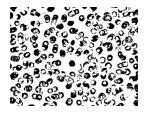

In [ ]:
test_single_image(path)

In [ ]:
path2='/content/drive/MyDrive/data/train/Lukemia/1.PNG'

[INFO] loading and preprocessing image...


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


ID: 0, Label: ['Lukemia', 'Anemia', 'Malaria', 'Healthy'] 0.0%
ID: 1, Label: ['Lukemia', 'Anemia', 'Malaria', 'Healthy'] 0.0%
ID: 2, Label: ['Lukemia', 'Anemia', 'Malaria', 'Healthy'] 100.0%
ID: 3, Label: ['Lukemia', 'Anemia', 'Malaria', 'Healthy'] 0.0%
Final Decision:
.
..
...
ID: 2, Label: Lukemia


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


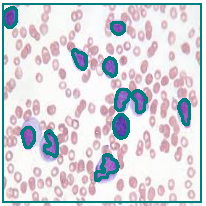

In [ ]:
test_single_image(path2)

[INFO] loading and preprocessing image...


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


ID: 0, Label: ['Lukemia', 'Anemia', 'Malaria', 'Healthy'] 0.0%
ID: 1, Label: ['Lukemia', 'Anemia', 'Malaria', 'Healthy'] 100.0%
ID: 2, Label: ['Lukemia', 'Anemia', 'Malaria', 'Healthy'] 0.0%
ID: 3, Label: ['Lukemia', 'Anemia', 'Malaria', 'Healthy'] 0.0%
Final Decision:
.
..
...
ID: 1, Label: Healthy


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


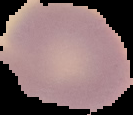

In [ ]:
path3='/content/drive/MyDrive/data/train/Healthy/C1_thinF_IMG_20150604_104722_cell_115.png'
test_single_image(path3)

[INFO] loading and preprocessing image...


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


ID: 0, Label: ['Lukemia', 'Anemia', 'Malaria', 'Healthy'] 0.0%
ID: 1, Label: ['Lukemia', 'Anemia', 'Malaria', 'Healthy'] 0.0%
ID: 2, Label: ['Lukemia', 'Anemia', 'Malaria', 'Healthy'] 0.0%
ID: 3, Label: ['Lukemia', 'Anemia', 'Malaria', 'Healthy'] 100.0%
Final Decision:
.
..
...
ID: 3, Label: Malaria


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


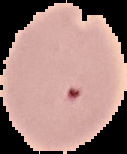

In [ ]:
path4='/content/drive/MyDrive/data/train/Malaria/C33P1thinF_IMG_20150619_114756a_cell_180.png'
test_single_image(path4)